In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# Bigger charts.
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [2]:
from math import factorial
# TODO(tbelaire): use better comb definition 
def comb(n, k):
    return factorial(n) / factorial(k) / factorial(n - k)

In [3]:
def diepool_pdf(diepool):
    pdf = []
    prob = 0.0
    for i in range(diepool + 1):
        prob = comb(diepool, i) * (1.0/3.0)**i * (2.0/3.0)**(diepool - i)
        pdf.append(prob)
    return pdf

def get(l, n):
    if n < 0:
        return 0.0
    if n >= len(l):
        return 0.0
    return l[n]


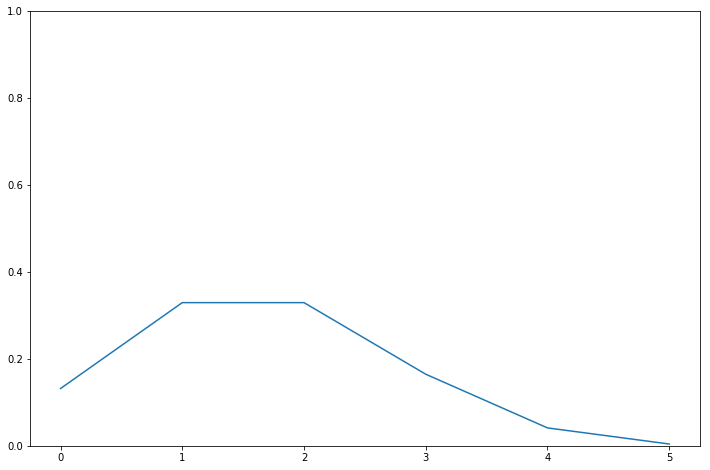

In [4]:
plt.ylim(0, 1)
plt.plot(diepool_pdf(5))


In [5]:
def prob_hits(attack, defence):
    attack_pdf = diepool_pdf(attack)
    defence_pdf = diepool_pdf(defence)
    net_hits_pdf = {}
    # TODO(tbelaire): Check for glitches?
    for net_hits in range(-defence, attack+1):
        prob = 0.0
        for attack_hits in range(0, attack):
            defence_hits = attack_hits - net_hits
            prob += get(attack_pdf, attack_hits) * get(defence_pdf, defence_hits)
        net_hits_pdf[net_hits] = prob
    return net_hits_pdf     

In [6]:
def damage_for_attack(attack_pool, dodge_pool, base_DV, ap, armor, body):
    attack_pool = max(0, attack_pool)
    dodge_pool = max(0, dodge_pool)
    modified_armor = armor + ap
    # TODO(tbelaire): Check for stun damage
    expected_soak = (modified_armor + body) / 3
    p_hits = prob_hits(attack_pool, dodge_pool)
    r = range(-dodge_pool, attack_pool+1)
    # plt.plot(r, [p_hits[i] for i in r])
    p_miss = sum(p_hits[i] for i in range(-dodge_pool, 1))
    # print("p_miss ", p_miss)
    expected_DV = sum(((base_DV + i - expected_soak)*p_hits[i] for i in range(1,attack_pool)))
    # print("expected_DV", expected_DV)
    return expected_DV

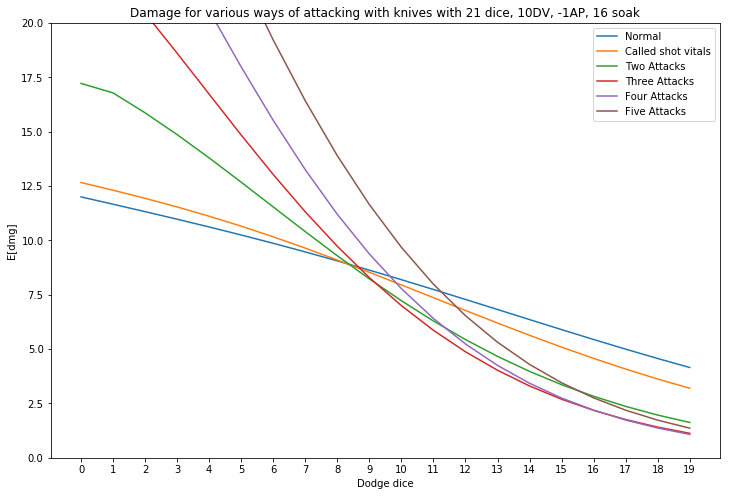

In [14]:
base_DV = 10
armor = 12
body = 4
AP = -1
params = {'base_DV':base_DV, 'armor': armor, 'body':body, 'ap': AP}
damage_for_different_dodge_values = [
    damage_for_attack(21, dodge_pool, **params)
    for dodge_pool in range(20)
]
called_shot = [
    damage_for_attack(21 - 4, dodge_pool, base_DV=(base_DV + 2), ap=AP, armor=armor, body=body)
    for dodge_pool in range(20)
]
two_knives = [
        damage_for_attack(11, dodge_pool, **params)
    +   damage_for_attack(11, dodge_pool - 1, **params)
    for dodge_pool in range(20)
]
three_knives = [
        damage_for_attack(7, dodge_pool, **params)
    +   damage_for_attack(7+1, dodge_pool - 1, **params)
    +   damage_for_attack(7+2, dodge_pool - 2, **params)

    for dodge_pool in range(20)
]
four_knives = [
        damage_for_attack(6, dodge_pool, **params)
    +   damage_for_attack(5+1, dodge_pool - 1, **params)
    +   damage_for_attack(5+2, dodge_pool - 2, **params)
    +   damage_for_attack(5+3, dodge_pool - 3, **params)
    for dodge_pool in range(20)
]
five_knives = [
        damage_for_attack(5, dodge_pool, **params)
    +   damage_for_attack(4+1, dodge_pool - 1, **params)
    +   damage_for_attack(4+2, dodge_pool - 2, **params)
    +   damage_for_attack(4+3, dodge_pool - 3, **params)
    +   damage_for_attack(4+4, dodge_pool - 4, **params)
    for dodge_pool in range(20)
]
plt.ylim(0, 20)
plt.xticks(range(20))
plt.title("Damage for various ways of attacking with knives with 21 dice, 10DV, -1AP, 16 soak")
plt.xlabel("Dodge dice")
plt.ylabel("E[dmg]")
plt.plot(damage_for_different_dodge_values, label="Normal")
plt.plot(called_shot, label="Called shot vitals")
plt.plot(two_knives, label="Two Attacks")
plt.plot(three_knives, label="Three Attacks")
plt.plot(four_knives, label="Four Attacks")
plt.plot(five_knives, label="Five Attacks")

legend = plt.legend()


[43.370576727551416,
 42.89851679992069,
 41.90381748240473,
 40.38454817499338,
 38.34929810333286,
 35.815649233770884,
 33.180103265008235,
 30.487668782019398,
 27.785627527820267,
 25.11972188096292,
 22.531306080602114,
 20.055470362877738,
 17.72004349421391,
 15.545322436215361,
 13.544356674052532,
 11.723618090740109,
 10.083905743674194,
 8.62136109551237,
 7.328497809478664,
 6.195177587831761]

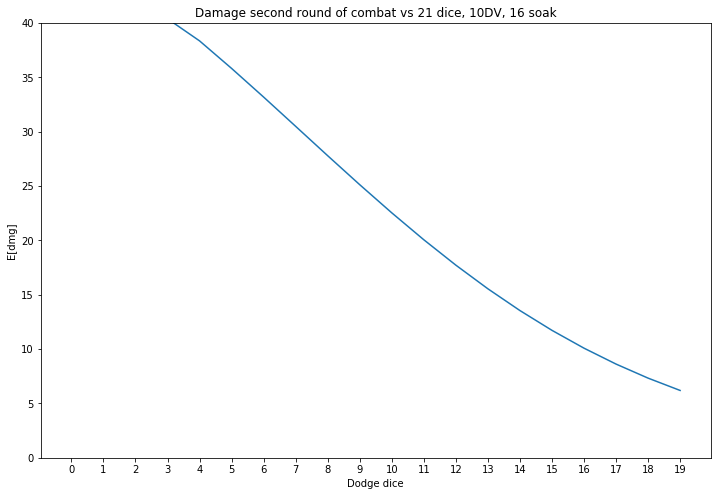

In [15]:
five_knives_round_2 = [
        damage_for_attack(5+5, dodge_pool, **params)
    +   damage_for_attack(4+6, dodge_pool - 1, **params)
    +   damage_for_attack(4+7, dodge_pool - 2, **params)
    +   damage_for_attack(4+8, dodge_pool - 3, **params)
    +   damage_for_attack(4+9, dodge_pool - 4, **params)
    for dodge_pool in range(20)
]
plt.ylim(0, 40)
plt.xticks(range(20))
plt.title("Damage second round of combat vs 21 dice, 10DV, 16 soak")
plt.xlabel("Dodge dice")
plt.ylabel("E[dmg]")
plt.plot(five_knives_round_2, label="Five Attacks")


five_knives_round_2